<a href="https://colab.research.google.com/github/zooodung/Face_Image_Emotion_Classification/blob/JS/FP_MODELING_EmotionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
def EmotionNet(input_shape=(224, 224, 3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
train_dir = '/content/drive/MyDrive/Project/Data/PREPROCESSED_IMG/train'
val_dir = '/content/drive/MyDrive/Project/Data/PREPROCESSED_IMG/val'

#train_dir = '/content/drive/MyDrive/Project/Data/img/train'
#val_dir = '/content/drive/MyDrive/Project/Data/img/val'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 4324 images belonging to 4 classes.
Found 765 images belonging to 4 classes.


In [ ]:
model = EmotionNet()

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
num_epochs = 100
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator
)

Epoch 1/100
136/136 [==============================] - 58s 413ms/step - loss: 1.3879 - accuracy: 0.2532 - val_loss: 1.3909 - val_accuracy: 0.2418
Epoch 2/100
136/136 [==============================] - 57s 417ms/step - loss: 1.3868 - accuracy: 0.2599 - val_loss: 1.3851 - val_accuracy: 0.2497
Epoch 3/100
136/136 [==============================] - 57s 421ms/step - loss: 1.3840 - accuracy: 0.2690 - val_loss: 1.3805 - val_accuracy: 0.2954
Epoch 4/100
136/136 [==============================] - 57s 420ms/step - loss: 1.3810 - accuracy: 0.2870 - val_loss: 1.3791 - val_accuracy: 0.2745
Epoch 5/100
136/136 [==============================] - 57s 420ms/step - loss: 1.3474 - accuracy: 0.3377 - val_loss: 1.3742 - val_accuracy: 0.3150
Epoch 6/100
136/136 [==============================] - 58s 424ms/step - loss: 1.2607 - accuracy: 0.4022 - val_loss: 1.1831 - val_accuracy: 0.4889
Epoch 7/100
136/136 [==============================] - 57s 420ms/step - loss: 1.1934 - accuracy: 0.4521 - val_loss: 1.2338 -

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

24/24 [==============================] - 2s 95ms/step - loss: 0.2944 - accuracy: 0.8928
Train Loss: 0.2282, Train Accuracy: 0.9193
Val Loss: 0.2944, Val Accuracy: 0.8928


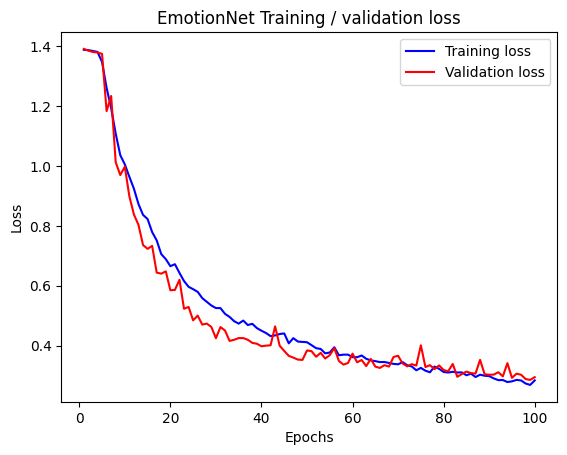

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('EmotionNet Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

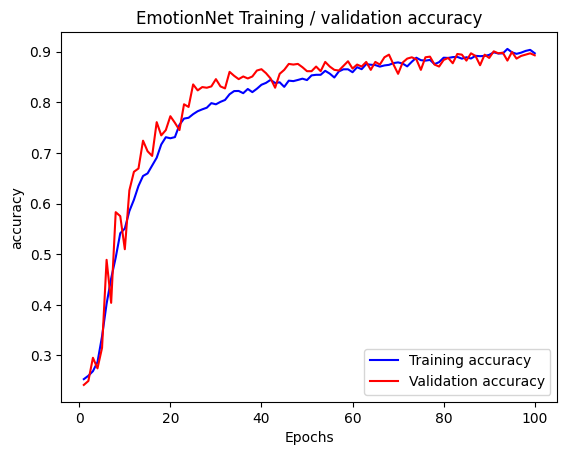

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('EmotionNet Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()